**This is an example showing how to read a netCDF file**

In this example, I read Sea Surface Temperature (SST) data from https://www.climate.gov/maps-data/data-snapshots/data-source-sea-surface-temperature 


Read more about exploring netCDF files from https://gist.github.com/jswhit/43dc116595ed66a92804 

By Shima Abadi, Jan. 2020 


---



Run this cell only the firs time to download the netCDF4

In [1]:
!pip install netCDF4

     |████████████████████████████████| 4.7MB 3.9MB/s 
     |████████████████████████████████| 296kB 41.8MB/s 


**Once netcdf4 is successfully installed, import it here**

In [2]:
import netCDF4 as nc

**Then, read the netCDF file and create a netCDF4.Dataset object.**

In [3]:
data = nc.Dataset('/content/oisst-avhrr-v02r01.20200207.nc', 'r')
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    source: ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfinder_AVHRR, Navy_AVHRR
    naming_authority: gov.noaa.ncei
    cdm_data_type: Grid
    date_modified: 2020-02-22T11:01:00Z
    date_created: 2020-02-22T11:01:00Z
    processing_level: NOAA Level 4
    institution: NOAA/National Centers for Environmental Information
    creator_url: https://www.ncei.noaa.gov/
    creator_email: oisst-help@noaa.gov
    keywords: Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature
    keywords_vocabulary: Global Change Master Directory (GCMD) Earth Science Keywords
    platform_vocabulary: Global Change Master Directory (GCMD) Platform Keywords
    instrument: Earth Remote Sensing Instruments > Passive Remote Sensing > Spectrometers/Radiometers > Imaging Spectrometers/Radiometers > AVHRR > Advanced Very High Resolution Radiometer
    instrument_vocabulary: Global Change Master Directory (GCMD) Instr

**To access variables, you need to read them from the variables dict**

In [4]:
sst = data.variables['sst']  # temperature variable
print(sst)

<class 'netCDF4._netCDF4.Variable'>
int16 sst(time, zlev, lat, lon)
    long_name: Daily sea surface temperature
    _FillValue: -999
    add_offset: 0.0
    scale_factor: 0.01
    valid_min: -300
    valid_max: 4500
    units: Celsius
unlimited dimensions: time
current shape = (1, 1, 720, 1440)
filling on


**Dimention and Shape**

Below are the dimention and shape of this variable. 
Each dimension has a variable associated with it which , in this example, are: time(1), zlev(1), lat(720), lon(1440)

In [5]:
sst.dimensions

('time', 'zlev', 'lat', 'lon')

In [6]:
sst.shape

(1, 1, 720, 1440)

**Let's get the corrdinate**

In [7]:
lat, lon = data.variables['lat'], data.variables['lon']
print(lat)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: Latitude
    units: degrees_north
    grids: Uniform grid from -89.875 to 89.875 by 0.25
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used


Now, get the time of the data

In [8]:
time = data.variables['time']
print(time)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Center time of the day
    units: days since 1978-01-01 12:00:00
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used


**Plot SST on a map**

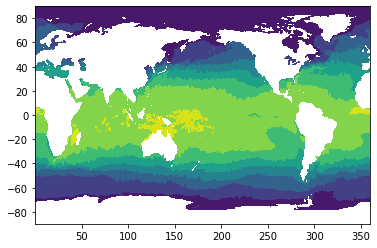

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
cs = plt.contourf(lon[:],lat[:],sst[0,0,:,:])